In [92]:
import numpy as np
import sys
import matplotlib.pyplot as plt



In [93]:
class traj:
    def __init__(self, box_size, positions,velocities,types):
        self.box_size =box_size
        self.positions=positions
        self.velocities=velocities
        self.types=types
        


In [94]:
a=traj(box_size=1,positions=1,velocities=1,types=1)

In [95]:
def read_lammpstrj(filename,N_particles,N_start,N_end):
    n_timestep=N_end-N_start
    box_size=np.zeros((n_timestep+1,3))
    positions=np.zeros((n_timestep+1,N_particles,3))
    velocities=np.zeros((n_timestep+1,N_particles,3))
    types=np.zeros((n_timestep+1,N_particles))
    count = 0

    with open(filename, 'rb') as f:
        for line in f:
            n_t=int(count/(N_particles+9))
            if n_t<N_start:
                count+=1
                continue
            if n_t>N_end:
                  break
            separate=line.split()
            if count%(9+N_particles)==5:
                box_size[n_t-N_start][0]=float(separate[1])-float(separate[0])
            if count%(9+N_particles)==6:
                box_size[n_t-N_start][1]=float(separate[1])-float(separate[0])
            if count%(9+N_particles)==7:
                box_size[n_t-N_start][2]=float(separate[1])-float(separate[0])
            if count%(9+N_particles)>=9:
                n_p=int(separate[0])-1
                types[n_t-N_start][n_p]=float(separate[1])
                positions[n_t-N_start][n_p][0]=float(separate[3])
                positions[n_t-N_start][n_p][1]=float(separate[4])
                positions[n_t-N_start][n_p][2]=float(separate[5])
                velocities[n_t-N_start][n_p][0]=float(separate[6])
                velocities[n_t-N_start][n_p][1]=float(separate[7])
                velocities[n_t-N_start][n_p][2]=float(separate[8])
            count+=1
    return traj(box_size=box_size,positions=positions,velocities=velocities,types=types)

In [98]:
a=read_lammpstrj('electric_field_langevin_large_small_att10.0.lammpstrj',5200,400,4400)

In [99]:
positions=a.positions

In [106]:
small_positions=a.positions[:,400:5200,0:2]

In [108]:
large_positions=a.positions[:,0:400,0:2]

In [100]:
velocities=a.velocities

In [109]:
small_velocities=velocities[:,400:5200,0:2]
large_positions=velocities[:,400:5200,0:2]

In [101]:
box_size=a.box_size

In [111]:
bin_size=10
bin_number=box_size/bin_size

In [112]:
bin_number

array([[90.  , 77.94,  0.1 ],
       [90.  , 77.94,  0.1 ],
       [90.  , 77.94,  0.1 ],
       ...,
       [90.  , 77.94,  0.1 ],
       [90.  , 77.94,  0.1 ],
       [90.  , 77.94,  0.1 ]])

In [110]:
small_positions[3000]

array([[-351.44 , -366.482],
       [-132.438, -367.051],
       [-369.575, -367.905],
       ...,
       [-271.558,  334.58 ],
       [ 294.7  ,  297.062],
       [ 110.88 ,  370.944]])

In [113]:
np.histogram2d(small_positions[3000,:,0],small_positions[3000,:,1],bins=[90,78])

(array([[ 0., 18.,  3., ...,  0.,  0.,  0.],
        [ 0., 15., 12., ...,  0.,  0.,  0.],
        [ 3., 17.,  2., ...,  0.,  0.,  0.],
        ...,
        [ 0., 12.,  3., ...,  0.,  0.,  0.],
        [ 9., 17.,  0., ...,  0.,  0.,  0.],
        [10., 17.,  1., ...,  0.,  0.,  0.]]),
 array([-4.49950000e+02, -4.39950778e+02, -4.29951556e+02, -4.19952333e+02,
        -4.09953111e+02, -3.99953889e+02, -3.89954667e+02, -3.79955444e+02,
        -3.69956222e+02, -3.59957000e+02, -3.49957778e+02, -3.39958556e+02,
        -3.29959333e+02, -3.19960111e+02, -3.09960889e+02, -2.99961667e+02,
        -2.89962444e+02, -2.79963222e+02, -2.69964000e+02, -2.59964778e+02,
        -2.49965556e+02, -2.39966333e+02, -2.29967111e+02, -2.19967889e+02,
        -2.09968667e+02, -1.99969444e+02, -1.89970222e+02, -1.79971000e+02,
        -1.69971778e+02, -1.59972556e+02, -1.49973333e+02, -1.39974111e+02,
        -1.29974889e+02, -1.19975667e+02, -1.09976444e+02, -9.99772222e+01,
        -8.99780000e+01, -7.997

(array([[0., 0., 5., ..., 0., 0., 0.],
        [0., 0., 4., ..., 0., 0., 0.],
        [0., 0., 2., ..., 0., 0., 0.],
        ...,
        [2., 5., 5., ..., 0., 0., 0.],
        [3., 5., 4., ..., 0., 0., 0.],
        [0., 2., 5., ..., 0., 0., 0.]]),
 array([-4.49950000e+02, -4.44950389e+02, -4.39950778e+02, -4.34951167e+02,
        -4.29951556e+02, -4.24951944e+02, -4.19952333e+02, -4.14952722e+02,
        -4.09953111e+02, -4.04953500e+02, -3.99953889e+02, -3.94954278e+02,
        -3.89954667e+02, -3.84955056e+02, -3.79955444e+02, -3.74955833e+02,
        -3.69956222e+02, -3.64956611e+02, -3.59957000e+02, -3.54957389e+02,
        -3.49957778e+02, -3.44958167e+02, -3.39958556e+02, -3.34958944e+02,
        -3.29959333e+02, -3.24959722e+02, -3.19960111e+02, -3.14960500e+02,
        -3.09960889e+02, -3.04961278e+02, -2.99961667e+02, -2.94962056e+02,
        -2.89962444e+02, -2.84962833e+02, -2.79963222e+02, -2.74963611e+02,
        -2.69964000e+02, -2.64964389e+02, -2.59964778e+02, -2.54965

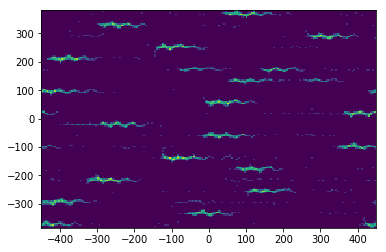

In [115]:
plt.hist2d(small_positions[3000,:,0],small_positions[3000,:,1],bins=[90*2,78*2])

In [88]:
yvelocities=a.velocities[0:4000,0:2000,1]

In [28]:
xvelocities=a.velocities[0:3000,0:400,0]

In [39]:
np.average(xvelocities)

19.90146097191042

In [30]:
xvelocities=np.swapaxes(xvelocities,0,1)

i=xvelocities[1,:]
N=len(i)
F = np.fft.fft(i, n=2*N)  #2*N because of zero-padding
PSD = F * F.conjugate()
PSD_sum=PSD.real

for i in xvelocities:
    N=len(i)
    F = np.fft.fft(i, n=2*N)  #2*N because of zero-padding
    PSD = F * F.conjugate()
    PSD_sum+=PSD.real

In [89]:
yvelocities=np.swapaxes(yvelocities,0,1)

i=yvelocities[1,:]
N=len(i)
F = np.fft.fft(i, n=2*N)  #2*N because of zero-padding
PSD = F * F.conjugate()
PSD_sum=PSD.real

for i in yvelocities:
    N=len(i)
    F = np.fft.fft(i, n=2*N)  #2*N because of zero-padding
    PSD = F * F.conjugate()
    PSD_sum+=PSD.real

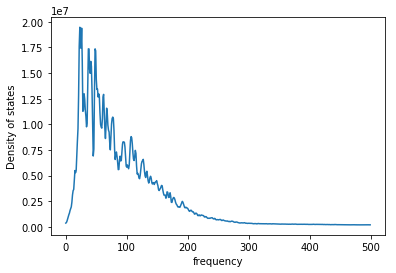

In [97]:
import matplotlib.pyplot as plt
plt.plot(PSD_sum[0:500])

plt.xlabel('frequency')
plt.ylabel('Density of states')

plt.savefig('Under_electric_field.png')

In [40]:
N

3000

In [8]:
np.average(xvelocities)

-3.5669275177951933e-12

In [14]:
yvelocities=a.velocities[0:1000,2000:26000,1]
np.average(yvelocities)

0.0005011218265328808

In [68]:
exvelocities=exvelocities.flatten()

(array([1.000e+00, 0.000e+00, 2.000e+00, 4.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 2.000e+00, 4.000e+00, 7.000e+00, 4.000e+00, 4.000e+00,
        1.500e+01, 1.400e+01, 1.400e+01, 2.800e+01, 3.500e+01, 4.500e+01,
        4.600e+01, 6.000e+01, 8.900e+01, 1.050e+02, 1.290e+02, 1.830e+02,
        1.960e+02, 2.490e+02, 2.910e+02, 3.510e+02, 3.870e+02, 3.910e+02,
        5.210e+02, 5.760e+02, 6.490e+02, 6.990e+02, 8.360e+02, 9.140e+02,
        9.810e+02, 1.074e+03, 1.141e+03, 1.232e+03, 1.251e+03, 1.452e+03,
        1.479e+03, 1.511e+03, 1.583e+03, 1.601e+03, 1.631e+03, 1.702e+03,
        1.752e+03, 1.595e+03, 1.657e+03, 1.542e+03, 1.579e+03, 1.541e+03,
        1.412e+03, 1.370e+03, 1.320e+03, 1.115e+03, 1.135e+03, 1.027e+03,
        9.230e+02, 8.640e+02, 7.590e+02, 7.260e+02, 6.290e+02, 5.250e+02,
        4.720e+02, 4.170e+02, 3.560e+02, 3.190e+02, 2.700e+02, 2.320e+02,
        2.110e+02, 1.660e+02, 1.280e+02, 1.080e+02, 6.100e+01, 7.000e+01,
        5.600e+01, 5.400e+01, 2.800e+0

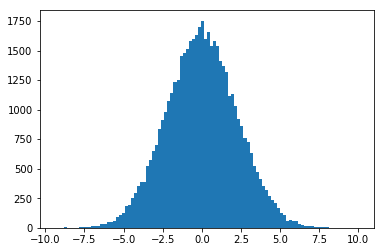

In [69]:
plt.hist(exvelocities,bins=100)

In [13]:
a.velocities

array([[[ 0.00000e+00,  0.00000e+00,  0.00000e+00],
        [ 0.00000e+00,  0.00000e+00,  0.00000e+00],
        [ 0.00000e+00,  0.00000e+00,  0.00000e+00],
        ...,
        [ 0.00000e+00,  0.00000e+00,  0.00000e+00],
        [ 0.00000e+00,  0.00000e+00,  0.00000e+00],
        [ 0.00000e+00,  0.00000e+00,  0.00000e+00]],

       [[-1.20208e-01, -1.07457e-02, -8.85979e-03],
        [-4.39132e-03, -7.18574e-03, -2.44551e-04],
        [-2.13284e-01, -4.59700e-02,  5.43428e-04],
        ...,
        [-1.76476e+00,  2.53173e+00, -1.24602e-01],
        [-3.16482e+00,  2.95223e+00,  4.73779e-02],
        [-3.86259e+00, -4.45873e+00,  1.33294e-01]],

       [[-6.82369e-02,  5.39500e-03, -8.52933e-03],
        [ 5.43124e-02,  1.29020e-01, -8.78177e-03],
        [-1.87436e-01,  1.30700e-01,  8.53146e-03],
        ...,
        [ 3.36514e+00,  9.73237e-01, -9.18081e-02],
        [-7.79912e-02, -1.60040e+00, -1.77494e-01],
        [ 2.29332e+00,  9.63147e-01,  1.56151e-02]],

       ...,

      

In [63]:
vearray=np.array(a.velocities[0:200])
vearray=np.swapaxes(vearray,0,1)
velarge=vearray[0:400]
vesmall=vearray[400:]
vnarray=np.array(a.velocities[200:])
vnarray=np.swapaxes(vnarray,0,1)
vnlarge=vnarray[0:400]
vnsmall=vnarray[400:]

count=0
eley=0
for i in range(0,400):
    for j in range(0,200):
        count+=1
        eley+=(velarge[i][j][1])**2
tley=eley/count
elny=0
count=0
for i in range(0,400):
    for j in range(0,2000):
        count+=1
        elny+=(vnlarge[i][j][1])**2
tlny=elny/count
count=0
elex=0
for i in range(0,400):
    for j in range(0,200):
        count+=1
        elex+=(velarge[i][j][0])**2
tlex=elex/count
elnx=0
count=0
for i in range(0,400):
    for j in range(0,2000):
        count+=1
        elnx+=(vnlarge[i][j][0])**2
tlnx=elnx/count
esey=0
count=0
for i in range(0,4800):
    for j in range(0,200):
        count+=1
        esey+=(vesmall[i][j][1])**2
tsey=esey/count
esex=0
count=0
for i in range(0,4800):
    for j in range(0,200):
        count+=1
        esex+=(vesmall[i][j][0])**2
tsex=esex/count


In [64]:
vsnx=0
count=0
for i in range(0,4800):
    for j in range(0,2000):
        count+=1
        vsnx+=(vnsmall[i][j][0])
vsnx_average=vsnx/count

In [65]:
vsex=0
count=0
for i in range(0,4800):
    for j in range(0,200):
        count+=1
        vsex+=(vesmall[i][j][0])
vsex_average=vsex/count

In [66]:
vsnx_average

9.502089273296864

In [54]:
tlnx

0.012509904734157721

In [23]:
velarge

array([[[ 0.        ,  0.        ,  0.        ],
        [-0.0209518 , -0.0372832 ,  0.        ],
        [-0.0455249 , -0.0085156 ,  0.        ],
        ...,
        [-0.0282453 , -0.0968218 ,  0.        ],
        [ 0.0309065 , -0.0151037 ,  0.        ],
        [ 0.0231987 , -0.0186509 ,  0.        ]],

       [[ 0.        ,  0.        ,  0.        ],
        [ 0.0278087 ,  0.0244357 ,  0.        ],
        [ 0.0244803 ,  0.0640127 ,  0.        ],
        ...,
        [ 0.0845195 ,  0.0718655 ,  0.        ],
        [ 0.0454012 , -0.0163588 ,  0.        ],
        [ 0.00107013,  0.0440818 ,  0.        ]],

       [[ 0.        ,  0.        ,  0.        ],
        [-0.0260924 ,  0.0474549 ,  0.        ],
        [-0.0172058 ,  0.0257557 ,  0.        ],
        ...,
        [-0.108047  , -0.00271505,  0.        ],
        [ 0.0532521 ,  0.0427759 ,  0.        ],
        [ 0.02918   ,  0.015181  ,  0.        ]],

       ...,

       [[ 0.        ,  0.        ,  0.        ],
        [ 0

In [21]:
ex/count

4168.096712374677

In [33]:
ez/count

0.0

In [14]:
varray=np.array(a.velocities[800:])
varray=np.swapaxes(varray,0,1)
parray=np.array(a.positions[800:])
parray=np.swapaxes(parray,0,1)
count1=0
count2=0
e1=0
e2=0
for i in range(0,5200):
    for j in range(0,4000):
        if parray[i][j][0]>-450 and parray[i][j][0]<-360:
            count1+=1
            e1+=varray[i][j][0]**2+varray[i][j][1]**2
        else:
            if parray[i][j][0]>360 and parray[i][j][0]<450:
                count1+=1
                e1+=varray[i][j][0]**2+varray[i][j][1]**2
            else:
                count2+=1
                e2+=varray[i][j][0]**2+varray[i][j][1]**2


In [15]:
t1=e1/count1
t2=e2/count2

In [17]:
t2

2.8526251846303516

In [8]:
parray.shape

(5200, 4001, 3)

In [ ]:
for i in range(0,5200)

In [28]:
 for line in f:
            n_t=int(count/(N_particles+9))
            if n_t<N_start:
                count+=1varray=np.array(a.velocities[800:])
varray=np.swapaxes(varray,0,1)
varray=varray[0:10]
i=varray[1,:,0]
N=len(i)
F = np.fft.fft(i, n=2*N)  #2*N because of zero-padding
PSD = F * F.conjugate()
PSD_sum=PSD.real
for j in range(0,3):
    for i in varray:
        N=len(i[:,j])
        F = np.fft.fft(i[:,j], n=2*N)  #2*N because of zero-padding
        PSD = F * F.conjugate()
        PSD_sum+=PSD.real

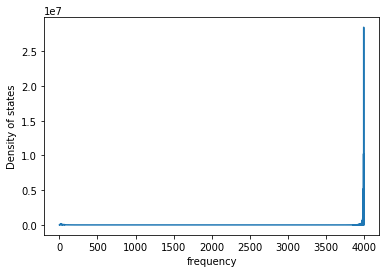

In [29]:
import matplotlib.pyplot as plt
plt.plot(PSD_sum[0:4000])

plt.xlabel('frequency')
plt.ylabel('Density of states')

plt.savefig('vibrate_wall_1.png')

In [40]:
a=read_lammpstrj('hexagonal_spring1.5.lammpstrj',400)

In [ ]:
import matplotlib.pyplot as plt
